# **Configurating DESI spectroscopic sample**

##### The objective of this notebook is to extract the DESI spectroscopic samples for BGS, LRG, and ELG, apply a binning scheme, and gather additional information necessary for constructing the 6x2pt data vector in combination with the LSST 3x2pt samples.

At this stage, we are working with the Early Data Release normalize sample, as datailed in **[EDR website](data.desi.lbl.gov/doc/releases/edr/)** to get the most reliable shape of the distribution. Additionally, we use the total number of galaxys as as detailed in Figure 15 of the paper **[2306.06307](https://arxiv.org/pdf/2306.06307)** to have a estimative for the most reliable DESI sample


In [45]:
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
from astropy.table import Table

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
from config_builder import load_yaml_file, ConfigBuilder
from utils import build_modeling_tools


In [46]:
config = load_yaml_file("../../runs/6x2pt_LSST_DESI_FULL_0.2bin/general.yaml")
config['general']['cosmology_file'] = '../../runs/6x2pt_LSST_DESI_FULL_0.2bin/config_yamls/cosmology.yaml'
config['general']['array_choices_file'] = '../../runs/6x2pt_LSST_DESI_FULL_0.2bin/config_yamls/array_choices.yaml'
config['general']['probes_file'] = '../../runs/6x2pt_LSST_DESI_FULL_0.2bin/config_yamls/probes_properties.yaml'
config['general']['probe_combinations_file'] = '../../runs/6x2pt_LSST_DESI_FULL_0.2bin/config_yamls/probes_combination.yaml'
config['general']['priors_file'] = '../../runs/6x2pt_LSST_DESI_FULL_0.2bin/config_yamls/prior_choices/LCDM_prior.yaml'
#config['general']['fisher_builder'] = 'No_necessary_here'
cfg = ConfigBuilder(config)
cfg.config_builder()
tools = build_modeling_tools(cfg.cosmo_config)
tools.ccl_cosmo.compute_nonlin_power()
cosmo = tools.ccl_cosmo

print(cfg.array_config)
z_config = cfg.array_config['z_array']
z = np.linspace(z_config['z_start'], z_config['z_stop'], z_config['z_number'])

[0.0, 0.0]
KeyError: spec_bgs0_delta_z not found in prior_config
[0.0, 0.0]
KeyError: spec_bgs1_delta_z not found in prior_config
[1.0, 1.0]
KeyError: spec_bgs0_sigma_z not found in prior_config
[1.0, 1.0]
KeyError: spec_bgs1_sigma_z not found in prior_config
[0.0, 0.0, 0.0, 0.0]
KeyError: spec_lrg0_delta_z not found in prior_config
[0.0, 0.0, 0.0, 0.0]
KeyError: spec_lrg1_delta_z not found in prior_config
[0.0, 0.0, 0.0, 0.0]
KeyError: spec_lrg2_delta_z not found in prior_config
[0.0, 0.0, 0.0, 0.0]
KeyError: spec_lrg3_delta_z not found in prior_config
[1.0, 1.0, 1.0, 1.0]
KeyError: spec_lrg0_sigma_z not found in prior_config
[1.0, 1.0, 1.0, 1.0]
KeyError: spec_lrg1_sigma_z not found in prior_config
[1.0, 1.0, 1.0, 1.0]
KeyError: spec_lrg2_sigma_z not found in prior_config
[1.0, 1.0, 1.0, 1.0]
KeyError: spec_lrg3_sigma_z not found in prior_config
[0.0, 0.0, 0.0, 0.0, 0.0]
KeyError: spec_elg0_delta_z not found in prior_config
[0.0, 0.0, 0.0, 0.0, 0.0]
KeyError: spec_elg1_delta_z not fo

DR1 and EDR comparison


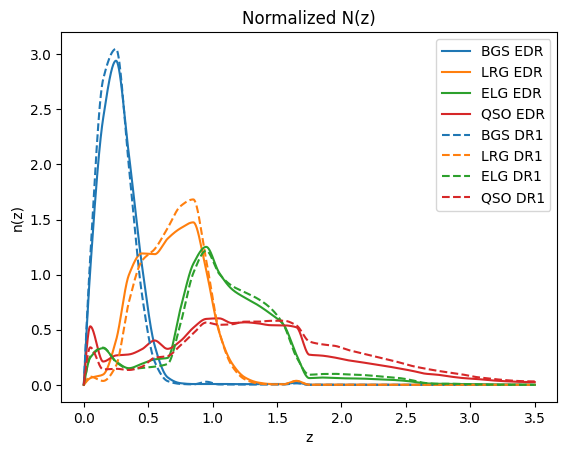

In [47]:
# loading the data from DESI EDR
n_bgs = np.loadtxt('./auxiliar_files/bgs_EDR_histograms.txt')
n_lrg = np.loadtxt('./auxiliar_files/lrg_EDR_histograms.txt')
n_elg = np.loadtxt('./auxiliar_files/elg_EDR_histograms.txt')
n_qso = np.loadtxt('./auxiliar_files/qso_EDR_histograms.txt')

# Creating the histograms
bins = np.arange(0, 3.5, 0.1)
n_bgs_hist, bins = np.histogram(n_bgs, bins = bins)
n_lrg_hist, bins = np.histogram(n_lrg, bins = bins)
n_elg_hist, bins = np.histogram(n_elg, bins = bins)
n_qso_hist, bins = np.histogram(n_qso, bins = bins)
bins_centers = (bins[1:] + bins[:-1]) / 2

# Constructing the center of the bins and the histograms
# Adding the zero dot to don't have problems with the interpolation
bins_centers = np.insert(bins_centers, 0, 0.0)
n_bgs_z = np.insert(n_bgs_hist, 0, 0.0)
n_lrg_z = np.insert(n_lrg_hist, 0, 0.0)
n_elg_z = np.insert(n_elg_hist, 0, 0.0)
n_qso_z = np.insert(n_qso_hist, 0, 0.0)

# Interpolating the histograms
n_bgs_interp = PchipInterpolator(bins_centers, n_bgs_z)
n_lrg_interp = PchipInterpolator(bins_centers, n_lrg_z)
n_elg_interp = PchipInterpolator(bins_centers, n_elg_z)
n_qso_interp = PchipInterpolator(bins_centers, n_qso_z)
n_bgs_z = n_bgs_interp(z)
n_lrg_z = n_lrg_interp(z)
n_elg_z = n_elg_interp(z)
n_qso_z = n_qso_interp(z)

# Normalizing the interpolated function
area = np.trapz(n_bgs_z, z)
n_bgs_z = n_bgs_z / area
area = np.trapz(n_lrg_z, z)
n_lrg_z = n_lrg_z / area
area = np.trapz(n_elg_z, z)
n_elg_z = n_elg_z / area
area = np.trapz(n_qso_z, z)
n_qso_z = n_qso_z / area

# Plotting the Interpolated histograms
plt.figure()
plt.plot(z, n_bgs_z, label='BGS EDR', color='C0')
plt.plot(z, n_lrg_z, label='LRG EDR', color='C1')
plt.plot(z, n_elg_z, label='ELG EDR', color='C2')
plt.plot(z, n_qso_z, label='QSO EDR', color='C3')

# loading the data from DESI EDR
n_bgs = np.loadtxt('./auxiliar_files/bgs_DR1_histograms.txt')
n_lrg = np.loadtxt('./auxiliar_files/lrg_DR1_histograms.txt')
n_elg = np.loadtxt('./auxiliar_files/elg_DR1_histograms.txt')
n_qso = np.loadtxt('./auxiliar_files/qso_DR1_histograms.txt')

# Creating the histograms
bins = np.arange(0, 3.5, 0.1)
n_bgs_hist, bins = np.histogram(n_bgs, bins = bins)
n_lrg_hist, bins = np.histogram(n_lrg, bins = bins)
n_elg_hist, bins = np.histogram(n_elg, bins = bins)
n_qso_hist, bins = np.histogram(n_qso, bins = bins)
bins_centers = (bins[1:] + bins[:-1]) / 2

# Constructing the center of the bins and the histograms
# Adding the zero dot to don't have problems with the interpolation
bins_centers = np.insert(bins_centers, 0, 0.0)
n_bgs_z = np.insert(n_bgs_hist, 0, 0.0)
n_lrg_z = np.insert(n_lrg_hist, 0, 0.0)
n_elg_z = np.insert(n_elg_hist, 0, 0.0)
n_qso_z = np.insert(n_qso_hist, 0, 0.0)

# Interpolating the histograms
n_bgs_interp = PchipInterpolator(bins_centers, n_bgs_z)
n_lrg_interp = PchipInterpolator(bins_centers, n_lrg_z)
n_elg_interp = PchipInterpolator(bins_centers, n_elg_z)
n_qso_interp = PchipInterpolator(bins_centers, n_qso_z)
n_bgs_z = n_bgs_interp(z)
n_lrg_z = n_lrg_interp(z)
n_elg_z = n_elg_interp(z)
n_qso_z = n_qso_interp(z)

# Normalizing the interpolated function
area = np.trapz(n_bgs_z, z)
n_bgs_z = n_bgs_z / area
area = np.trapz(n_lrg_z, z)
n_lrg_z = n_lrg_z / area
area = np.trapz(n_elg_z, z)
n_elg_z = n_elg_z / area
area = np.trapz(n_qso_z, z)
n_qso_z = n_qso_z / area

# Plotting the normalized N(z)
plt.plot(z, n_bgs_z, color = 'C0', label = 'BGS DR1', linestyle = '--')
plt.plot(z, n_lrg_z, color = 'C1', label = 'LRG DR1', linestyle = '--')
plt.plot(z, n_elg_z, color = 'C2', label = 'ELG DR1', linestyle = '--')
plt.plot(z, n_qso_z, color = 'C3', label = 'QSO DR1', linestyle = '--')
plt.title('Normalized N(z)')
plt.xlabel('z')
plt.ylabel('n(z)')
plt.legend()
plt.show()



### Early Data Release sample


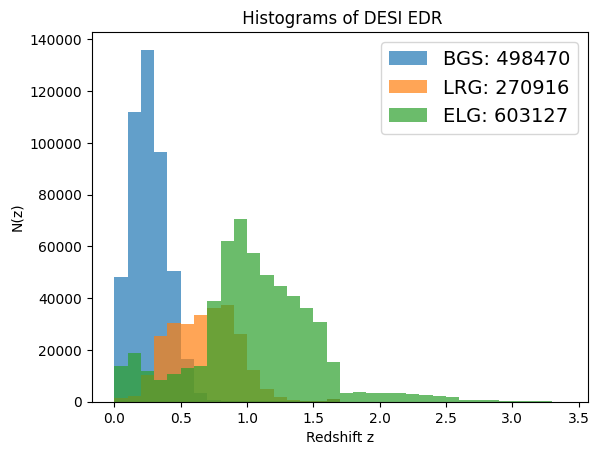

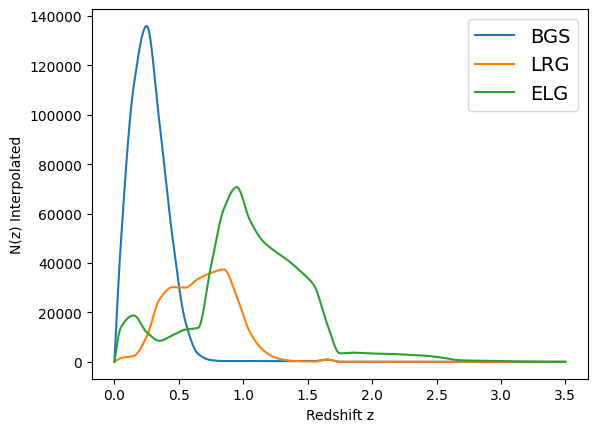

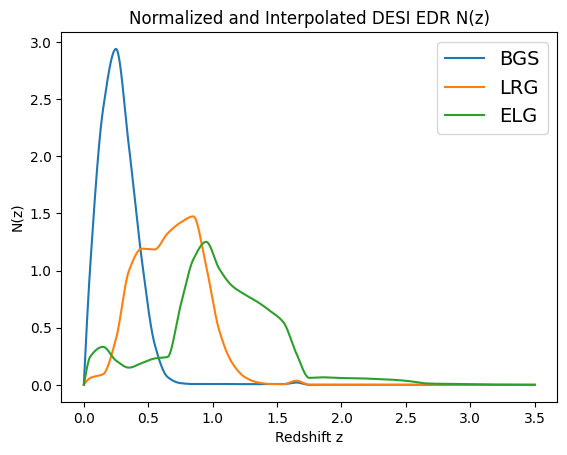

In [48]:
# loading the data from DESI EDR
n_bgs = np.loadtxt('./auxiliar_files/bgs_EDR_histograms.txt')
n_lrg = np.loadtxt('./auxiliar_files/lrg_EDR_histograms.txt')
n_elg = np.loadtxt('./auxiliar_files/elg_EDR_histograms.txt')
n_qso = np.loadtxt('./auxiliar_files/qso_EDR_histograms.txt')

# Creating the histograms
bins = np.arange(0, 3.5, 0.1)
n_bgs_hist, bins = np.histogram(n_bgs, bins = bins)
n_lrg_hist, bins = np.histogram(n_lrg, bins = bins)
n_elg_hist, bins = np.histogram(n_elg, bins = bins)
n_qso_hist, bins = np.histogram(n_qso, bins = bins)
bins_centers = (bins[1:] + bins[:-1]) / 2

# Plotting the histograms
plt.hist(n_bgs, color = 'C0', alpha=0.7, bins = bins, label = f'BGS: {len(n_bgs)}')
plt.hist(n_lrg, color = 'C1', alpha=0.7, bins = bins, label = f'LRG: {len(n_lrg)}')
plt.hist(n_elg, color = 'C2', alpha=0.7, bins = bins, label = f'ELG: {len(n_elg)}')
# plt.hist(n_qso, color = 'C3', alpha=0.7, bins = bins, label = f'QSO: {len(n_qso)} sources')
plt.xlabel('Redshift z')
plt.ylabel('N(z)')
plt.title(" Histograms of DESI EDR")
plt.legend(fontsize = 14)
plt.show()

# Constructing the center of the bins and the histograms
# Adding the zero dot to don't have problems with the interpolation
bins_centers = np.insert(bins_centers, 0, 0.0)
n_bgs_z = np.insert(n_bgs_hist, 0, 0.0)
n_lrg_z = np.insert(n_lrg_hist, 0, 0.0)
n_elg_z = np.insert(n_elg_hist, 0, 0.0)
n_qso_z = np.insert(n_qso_hist, 0, 0.0)

# Interpolating the histograms
n_bgs_interp = PchipInterpolator(bins_centers, n_bgs_z)
n_lrg_interp = PchipInterpolator(bins_centers, n_lrg_z)
n_elg_interp = PchipInterpolator(bins_centers, n_elg_z)
n_qso_interp = PchipInterpolator(bins_centers, n_qso_z)
n_bgs_z = n_bgs_interp(z)
n_lrg_z = n_lrg_interp(z)
n_elg_z = n_elg_interp(z)
n_qso_z = n_qso_interp(z)

# Plotting the interpolated functions
plt.plot(z, n_bgs_z, color = 'C0', linestyle = '-', label = 'BGS')
plt.plot(z, n_lrg_z, color = 'C1', linestyle = '-', label = 'LRG')
plt.plot(z, n_elg_z, color = 'C2', linestyle = '-', label = 'ELG')
# plt.plot(z, n_qso_z, color = 'C3', linestyle = '--')
plt.xlabel("Redshift z")
plt.ylabel("N(z) Interpolated")
plt.title("")
plt.legend(fontsize = 14)
plt.show()

# Normalizing the interpolated function
area = np.trapz(n_bgs_z, z)
n_bgs_z = n_bgs_z / area
area = np.trapz(n_lrg_z, z)
n_lrg_z = n_lrg_z / area
area = np.trapz(n_elg_z, z)
n_elg_z = n_elg_z / area
area = np.trapz(n_qso_z, z)
n_qso_z = n_qso_z / area

# Plotting the normalized N(z)
plt.plot(z, n_bgs_z, color = 'C0', label = 'BGS')
plt.plot(z, n_lrg_z, color = 'C1', label = 'LRG')
plt.plot(z, n_elg_z, color = 'C2', label = 'ELG')
# plt.plot(z, n_qso_z, color = 'C3', label = 'QSO EDR')
plt.xlabel("Redshift z")
plt.ylabel("N(z)")
plt.title("Normalized and Interpolated DESI EDR N(z)")
plt.legend(fontsize = 14)
plt.show()

# Saving the normalized N(z) to a file
np.savetxt('./auxiliar_files/bgs_EDR_normalized.txt', n_bgs_z)
np.savetxt('./auxiliar_files/lrg_EDR_normalized.txt', n_lrg_z)
np.savetxt('./auxiliar_files/elg_EDR_normalized.txt', n_elg_z)
np.savetxt('./auxiliar_files/qso_EDR_normalized.txt', n_qso_z)



#### **Extracting and manipulating the survey validation data points from ecsv file**


In [49]:
# Information about the sky area of the surveys
DESI_sky = cfg.probes_config["probes"]["desi"]["sky_area"] #deg^2  #
Full_sky = 4*np.pi*(180/np.pi)**2
LSST_sky = cfg.probes_config["probes"]["lsst"]["sky_area"] #deg^2
LSST_overlap_DESI_sky = cfg.probes_config["probes"]["overlap"]["sky_area"] #deg^2
print('fsky_lsst :',LSST_sky/Full_sky)
print('fsky_lsst_overlap_desi :', LSST_overlap_DESI_sky/Full_sky)
print('fsky_desi :', DESI_sky/Full_sky)

# Load the data and convert it to a pandas DataFrame
file_path = './auxiliar_files/Desi_data.ecsv'
data = Table.read(file_path, format='ascii.ecsv')
data = data.to_pandas()
data['BGS'] = data['BGS_BRIGHT'] + data['BGS_FAINT']
data['ELG'] = data['ELG_LOP'] + data['ELG_VLO']
data['Total'] = data['BGS'] + data['ELG'] + data['QSO'] + data['LRG']
data_z = data[['ZMIN', 'ZMAX']]
data_no_z = data.drop(columns=['ZMIN', 'ZMAX'])*DESI_sky
data = pd.concat([data_z, data_no_z], axis=1)
data

fsky_lsst : 0.43633231299858233
fsky_lsst_overlap_desi : 0.09696273622190718
fsky_desi : 0.3393695767766751


,ZMIN,ZMAX,BGS_BRIGHT,BGS_FAINT,LRG,ELG_LOP,ELG_VLO,QSO,FDR,BGS,ELG,Total
0,0.0,0.1,1414840.000,1.315700e+05,9620.10,134400.0,1400.0,753.312,1631000.0,1.546410e+06,135800.0,1.692583e+06
1,0.1,0.2,3237640.000,7.198170e+05,19901.14,294000.0,2800.0,1760.766,4303600.0,3.957457e+06,296800.0,4.275919e+06
2,0.2,0.3,3036320.000,1.493800e+06,90256.46,166600.0,4200.0,3457.104,2672600.0,4.530120e+06,170800.0,4.794634e+06
3,0.3,0.4,1361906.000,1.233350e+06,413219.80,88200.0,7000.0,8556.856,1024800.0,2.595256e+06,95200.0,3.112232e+06
4,0.4,0.5,407456.000,6.574694e+05,664918.80,89600.0,7000.0,16007.880,168000.0,1.064925e+06,96600.0,1.842452e+06
5,0.5,0.6,57911.000,1.884274e+05,918328.60,70000.0,7000.0,27635.300,0.0,2.463384e+05,77000.0,1.269302e+06
6,0.6,0.7,4007.920,2.780344e+04,1119820.80,176400.0,26600.0,46262.860,1164800.0,3.181136e+04,203000.0,1.400895e+06
7,0.7,0.8,572.572,2.935254e+03,1304280.60,761600.0,218400.0,66468.640,1380400.0,3.507826e+03,980000.0,2.354257e+06
8,0.8,0.9,654.360,7.066346e+02,1390911.20,1433600.0,560000.0,88682.300,2692200.0,1.360995e+03,1993600.0,3.474554e+06
9,0.9,1.0,368.074,3.533180e+02,891417.80,1682800.0,652400.0,101608.780,2931600.0,7.213920e+02,2335200.0,3.328948e+06


Ploting all the data points of the SV sample to check consistancy:


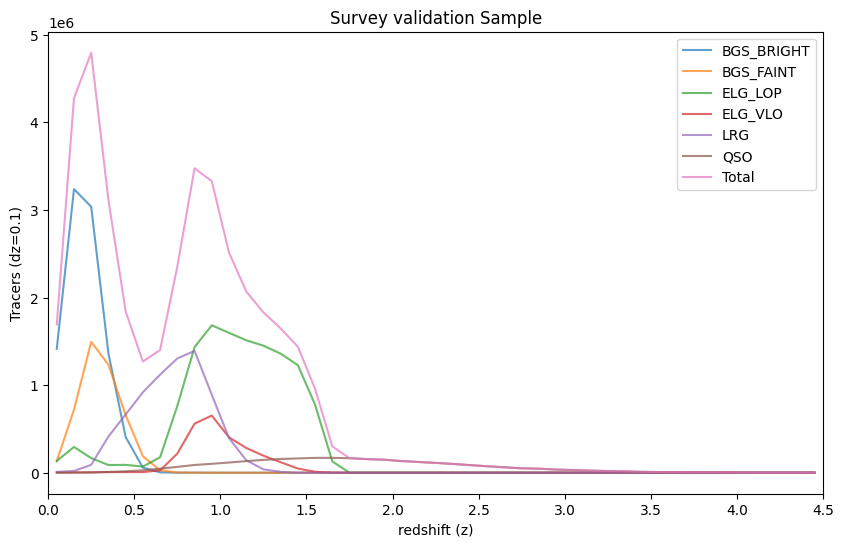

In [50]:
# redshift information:
zmin =  data['ZMIN']
zmax =  data['ZMAX']
bin_edges = np.concatenate((zmin, zmax[-1:]))
bin_widths = zmax - zmin
bin_centers = bin_widths/2 + zmin 
n_bins = len(bin_centers)

# Plotting the all data points.
spec_types = ['BGS_BRIGHT', 'BGS_FAINT', 'ELG_LOP', 'ELG_VLO', 'LRG', 'QSO', 'Total']
plt.figure(figsize=(10, 6))
for types in spec_types:   
    # Extract the data for the current type
    data_spec = data[types]
    # Ploting the data points
    plt.plot(bin_centers, data_spec, alpha=0.7, label = types)
plt.ylabel('Tracers (dz=0.1)')
plt.xlabel('redshift (z)')
plt.xlim(0, 4.5)
plt.legend()
plt.title('Survey validation Sample')
plt.show()       

#### Summary Sample information. (e.g EDR normalized distribution with n_eff from SV)


n_eff bgs: 0.27733944469444444
n_eff lrg: 0.147011425
n_eff elg: 0.3075
n_eff qso: 0.056310435277777786


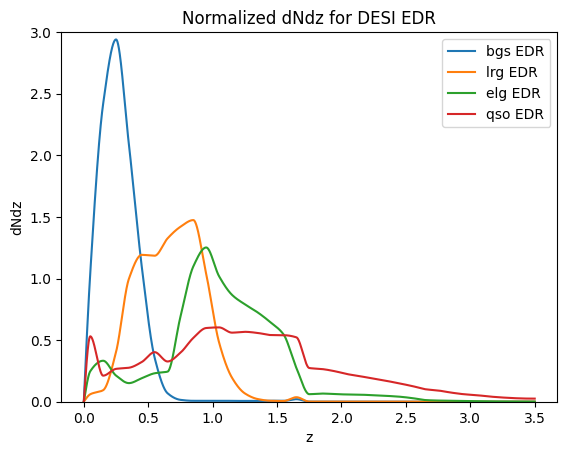

In [51]:
# load the normalized dNdz
dndz_desi_bgs_normalized = np.loadtxt('./auxiliar_files/bgs_EDR_normalized.txt')
dndz_desi_lrg_normalized = np.loadtxt('./auxiliar_files/lrg_EDR_normalized.txt')
dndz_desi_elg_normalized = np.loadtxt('./auxiliar_files/elg_EDR_normalized.txt')
dndz_desi_qso_normalized = np.loadtxt('./auxiliar_files/qso_EDR_normalized.txt')

# Effective number density of each type of galaxy provide by the SV data
ngal_bgs = (data['BGS'].sum())/(DESI_sky*3600)
ngal_lrg = (data['LRG'].sum())/(DESI_sky*3600)
ngal_elg = (data['ELG'].sum())/(DESI_sky*3600)
ngal_qso = (data['QSO'].sum())/(DESI_sky*3600)
print(f'n_eff bgs: {ngal_bgs}')
print(f'n_eff lrg: {ngal_lrg}')
print(f'n_eff elg: {ngal_elg}')
print(f'n_eff qso: {ngal_qso}')

plt.plot(z, dndz_desi_bgs_normalized, label='bgs EDR')
plt.plot(z, dndz_desi_lrg_normalized, label='lrg EDR')
plt.plot(z, dndz_desi_elg_normalized, label='elg EDR')
plt.plot(z, dndz_desi_qso_normalized, label='qso EDR')
plt.ylim(0, 3.0)
plt.legend()
plt.title('Normalized dNdz for DESI EDR')
plt.xlabel('z')
plt.ylabel('dNdz')
plt.show()

## **The next Cells contain all the information needed to binned the distribution and get the bias and ngal per bin and other additional info's**


#### binning function:


In [52]:
def binnning_distribution(type_, z_begin, z_stop, bin, dndz, n_eff):
    """
    Function to bin the distribution of the galaxies in redshift bins.
    """
    # Color map for the plots
    color = {'bgs': 'BLUE', 'lrg': 'ORANGE', 'elg': 'GREEN', 'qso': 'C3'}
    # Create the bins
    bin_edges = np.arange(z_begin, z_stop+bin, bin)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    
    # List to store the number of galaxies in each bin
    n_gal = []
    # List to store the binned dNdz
    dndz_binned_normalize = []
    dndz_binned_normalize.append(z)
    for i in range(len(bin_centers)):
        # Select the galaxies in the bin
        start = bin_edges[i]
        end = bin_edges[i+1]
        mask = (z >= start) & (z < end)
        # Binning the normalize distribution
        dndz_binned = np.where(mask, dndz, 0.0)
        # Compute the number of galaxies in the bin
        n_gal.append(np.trapz(dndz_binned, z)*n_eff)
        # Normalize the binned distribution
        dndz_binned_norm = dndz_binned/np.trapz(dndz_binned, z) 
        # Append the binned dNdz to the list and plot it
        plt.plot(z, dndz_binned_norm, label=f'spec', color=color[type_])
        plt.axvline(start, color="C2", lw=0.9, linestyle='--', label="binning cuts")
        plt.axvline(end, color="C2", lw=0.9, linestyle='--', label="binning cuts")
        dndz_binned_normalize.append(dndz_binned_norm)
    #plt.plot(z, dndz, label='full distribution', color='Green')
   
    np.savetxt(f'./binned_distribution/desi_{type_}_{bin}_binned_distribution_EDR.txt', np.array(dndz_binned_normalize))
    plt.title(f'DESI {type_} EDR binned and normalized N(z)')
    plt.xlabel('z')
    plt.ylabel('N(z)')
    #plt.ylim(0, 10.0)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper right', frameon=False)
    plt.show()

    # Calculate the bias for the DESI BGS
    a = 1/(1+bin_centers)
    factor = {'bgs': 1.34, 'lrg': 1.7, 'elg': 0.84, 'qso': 1.1}
    bias = factor[type_]/cosmo.growth_factor(a)
    sigma_z = 0.0005*(1+bin_centers)
    delta_z = 0.0002*(1+bin_centers)
    # Print the information about the binned dNdz's
    print(f'bin_edges {type_}: {list(bin_edges)}')
    print(f'bin_centers {type_}: {list(bin_centers)}')
    print(f'n_bins {type_}: {len(bin_centers)}')
    print(f'sigma_z {type_}: {sigma_z}')
    print(f'delta_z {type_}: {delta_z}')
    print(f'bias {type_}: {list(bias)}')
    print(f'ngal {type_}: {n_gal}')
    print(f'n_eff {type_}: {sum(n_gal)}')

### BGS:


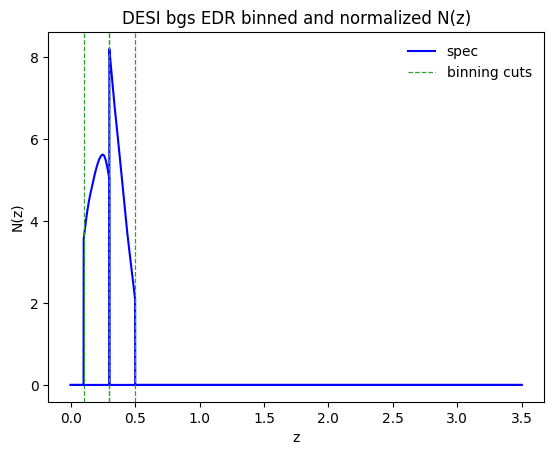

bin_edges bgs: [0.1, 0.30000000000000004, 0.5000000000000001]
bin_centers bgs: [0.2, 0.4000000000000001]
n_bins bgs: 2
sigma_z bgs: [0.0006 0.0007]
delta_z bgs: [0.00024 0.00028]
bias bgs: [1.4961698190993642, 1.6673430709427242]
ngal bgs: [0.14515486916364823, 0.0889083176546928]
n_eff bgs: 0.23406318681834104


In [53]:
# the BGS distribution is already normalized
dndz_desi_bgs_normalized = np.loadtxt('./auxiliar_files/bgs_EDR_normalized.txt')

# Defining the binning configuration for the dNdz's for DESI BGS
type_ = 'bgs'
bin_width = 0.2
z_start = 0.1
z_end = 0.5
n_eff = ngal_bgs
binnning_distribution(type_, z_start, z_end, bin_width, dndz_desi_bgs_normalized, n_eff)

### LRG:


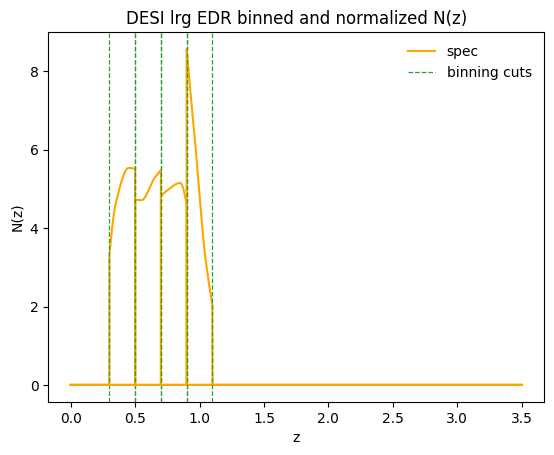

bin_edges lrg: [0.3, 0.5, 0.7, 0.9000000000000001, 1.1]
bin_centers lrg: [0.4, 0.6, 0.8, 1.0]
n_bins lrg: 4
sigma_z lrg: [0.0007 0.0008 0.0009 0.001 ]
delta_z lrg: [0.00028 0.00032 0.00036 0.0004 ]
bias lrg: [2.115285985524351, 2.346501032337311, 2.5879003809196806, 2.836648489863814]
ngal lrg: [0.03166039207944149, 0.03695726511288676, 0.04204793442688488, 0.02257683682084172]
n_eff lrg: 0.13324242844005485


In [54]:
# the LRG distribution is already normalized
dndz_desi_lrg_normalized = np.loadtxt('./auxiliar_files/lrg_EDR_normalized.txt')

# Defining the binning configuration for the dNdz's for DESI LRG
type_ = 'lrg'
bin_width = 0.2
z_start = 0.3
z_end = 1.1
n_eff = ngal_lrg
binnning_distribution(type_, z_start, z_end, bin_width, dndz_desi_lrg_normalized, n_eff)

### ELG:


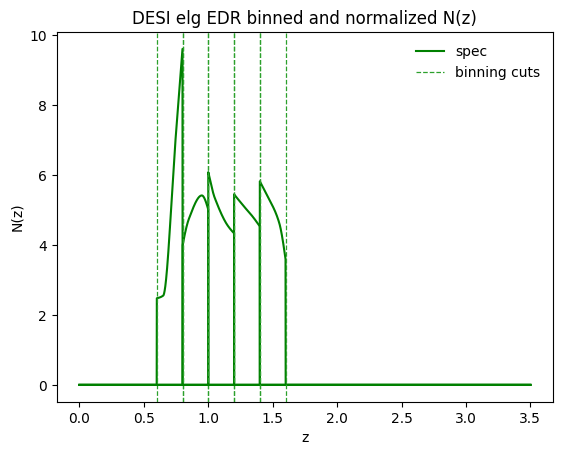

bin_edges elg: [0.6, 0.8, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005]
bin_centers elg: [0.7, 0.9, 1.1, 1.3000000000000003, 1.5000000000000004]
n_bins elg: 5
sigma_z elg: [0.00085 0.00095 0.00105 0.00115 0.00125]
delta_z elg: [0.00034 0.00038 0.00042 0.00046 0.0005 ]
bias elg: [1.2185567892039038, 1.3397991972032248, 1.4641308471264376, 1.5907140124364125, 1.7189580016449166]
ngal elg: [0.029404105461406413, 0.07104164621766129, 0.058498187189113156, 0.04653108881776866, 0.03621607594085797]
n_eff elg: 0.24169110362680749


In [55]:
# the ELG distribution is already normalized
dndz_desi_elg_normalized = np.loadtxt('./auxiliar_files/elg_EDR_normalized.txt')

# Defining the binning configuration for the dNdz's for DESI ELG
type_ = 'elg'
bin_width = 0.2
z_start = 0.6
z_end = 1.599
n_eff = ngal_elg
binnning_distribution(type_, z_start, z_end, bin_width, dndz_desi_elg_normalized, n_eff)

#### QSO:


In [56]:
# the QSO distribution is already normalized
dndz_desi_qso_normalized = np.loadtxt('./auxiliar_files/qso_EDR_normalized.txt')

# Defining the binning configuration for the dNdz's for DESI QSO
type_ = 'qso'
# bin_width = 0.2
# z_start = 1.6
# z_end = 2.1
# n_eff = ngal_qso
# binnning_distribution(type_, z_start, z_end, bin_width, dndz_desi_qso_normalized, n_eff)